In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [3]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
# Checking if there are any columns missing in the TEST set and if there are any differences in column names.
set(dftrain.columns)-set(dftest.columns)

{'SalePrice'}

In [6]:
# Combining the train and test sets
#dftrain.drop('SalePrice', axis=1, inplace=True)

In [7]:
df = pd.concat([dftrain.drop('SalePrice', axis=1),dftest])

In [8]:
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(2919, 80)
(1460, 81)
(1459, 80)


In [9]:
# Using the Ames Housing documentation file (http://www.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt) to
# separate the nominal, ordinal, discrete and continuous variables.

In [10]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
len(df.columns)

80

In [12]:
continuous = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
              '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
              'ScreenPorch', 'PoolArea', 'MiscVal']

discrete = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
            'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']

nominal = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
           'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
           'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

ordinal = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
           'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

# The column Id is removed

In [13]:
len(continuous)+len(discrete)+len(nominal)+len(ordinal)

79

### Removing OUTLIERS as per the instructors recommendation

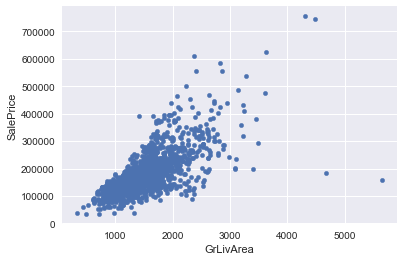

In [14]:
dftrain.plot(kind='scatter', x='GrLivArea', y='SalePrice')
plt.show()

In [15]:
df = df[df['GrLivArea']<=4000]

# dftest = dftest[dftest['GrLivArea']<=4000]
# dftest.reset_index(drop=True, inplace=True)
# dftrain = dftrain[dftrain['GrLivArea']<=4000]
# dftrain.reset_index(drop=True, inplace=True)

### DATA CLEANING AND DATA PRE-PROCESSING

#### CONTINUOUS variables

In [16]:
df[continuous].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914 entries, 0 to 1458
Data columns (total 19 columns):
LotFrontage      2428 non-null float64
LotArea          2914 non-null int64
MasVnrArea       2891 non-null float64
BsmtFinSF1       2913 non-null float64
BsmtFinSF2       2913 non-null float64
BsmtUnfSF        2913 non-null float64
TotalBsmtSF      2913 non-null float64
1stFlrSF         2914 non-null int64
2ndFlrSF         2914 non-null int64
LowQualFinSF     2914 non-null int64
GrLivArea        2914 non-null int64
GarageArea       2913 non-null float64
WoodDeckSF       2914 non-null int64
OpenPorchSF      2914 non-null int64
EnclosedPorch    2914 non-null int64
3SsnPorch        2914 non-null int64
ScreenPorch      2914 non-null int64
PoolArea         2914 non-null int64
MiscVal          2914 non-null int64
dtypes: float64(7), int64(12)
memory usage: 455.3 KB


In [18]:
# Display columns with missing values and sort them by percent missing
def missvalpercent(df,features):
    missdict = {}
    for ftre in features:
        temp = df[ftre].isnull().sum()
        if temp>0:
            missdict[ftre] = round(((temp/len(df))*100),2)

    return pd.Series(missdict, index=missdict.keys()).sort_values(ascending=False)



missvalpercent(df,continuous)

LotFrontage    16.68
MasVnrArea      0.79
GarageArea      0.03
TotalBsmtSF     0.03
BsmtUnfSF       0.03
BsmtFinSF2      0.03
BsmtFinSF1      0.03
dtype: float64

We see that 'LotFrontage' and 'MasVnrArea' have some missing values.

In [ ]:
# null values in LotFrontage probably mean there is no lot frontage
# null values in MasVnrArea probably mean there is no veneer.
# We'll replace the null values in both these columns with 0

dftrain.loc[dftrain['LotFrontage'].isnull(), 'LotFrontage'] = 0
dftrain.loc[dftrain['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

# Convert the dtype of all these columns to float

dftrain[continuous] = dftrain[continuous].astype(np.float64)

In [ ]:
dftest[continuous].info()

In [ ]:
missvalpercent(dftest,continuous)

In [ ]:
# As done earlier, we'll replace null values in LotFrontage and MasVnrArea columns to 0
dftest.loc[dftest['LotFrontage'].isnull(), 'LotFrontage'] = 0
dftest.loc[dftest['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

# After some testing, it's revealed that NAs attributed to TotalBsmtSF, BsmtUnfSF, BsmtFinSF1 & BsmtFinSF2 belong to the same
# row. This means, this one data point doesnt have any Basement. We can set the above four values to zero.
dftest.loc[dftest['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = 0
dftest.loc[dftest['BsmtUnfSF'].isnull(), 'BsmtUnfSF'] = 0
dftest.loc[dftest['BsmtFinSF1'].isnull(), 'BsmtFinSF1'] = 0
dftest.loc[dftest['BsmtFinSF2'].isnull(), 'BsmtFinSF2'] = 0

# Also, the GarageArea can be set to zero because when checked for GarageCars, it comes to be none.
dftest.loc[dftest['GarageArea'].isnull(), 'GarageArea'] = 0

# Convert the dtype of all these columns to float
dftest[continuous] = dftest[continuous].astype(np.float64)

#### DISCRETE variables

In [ ]:
dftrain[discrete].info()

In [ ]:
dftrain[dftrain['GarageCars']==0]['GarageYrBlt'].unique()

# It looks like all the NaNs in "GarageYrBlt' are the ones where there are no garages.
# We'll replace the null values with 0 and change the data type to integer.

In [ ]:
dftrain.loc[dftrain['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0
dftrain['GarageYrBlt'] = dftrain['GarageYrBlt'].astype(np.int64)

In [ ]:
dftest[discrete].info()

In [ ]:
#Display and sort the columns with missing values
missvalpercent(dftest,discrete)

In [ ]:
# There is one observation which has NaN in GarageCars. This observation has NaN in the GarageYrBlt too. We can assume no 
# garage and set GarageCars to 0
dftest.loc[dftest['GarageCars'].isnull(), 'GarageCars'] = 0

In [ ]:
dftest[dftest['GarageYrBlt'].isnull()]['GarageCars'].unique()

In [ ]:
# From above we can conclude that there are Garages with NaN in GarageYrBlt but 1 GarageCars.
# We replace the NaN in GarageYrBlt corresponding to 1 GarageCars with median year of 1 GarageCars.
dftest.loc[dftest['GarageYrBlt'].isnull() & (dftest['GarageCars']==1), 'GarageYrBlt']= pd.concat(
    [dftrain['GarageYrBlt'],dftest['GarageYrBlt']]).median()

# The rest of the cells in GarageYrBlt can be assigned 0 as they have no garages like we did earlier.
dftest.loc[dftest['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0

# Let's replace the NaNs in BsmtHalfBath and BsmtFullBath by their median values
dftest.loc[dftest['BsmtHalfBath'].isnull(),'BsmtHalfBath'] = pd.concat([dftrain['BsmtHalfBath'],dftest['BsmtHalfBath']]).median()
dftest.loc[dftest['BsmtFullBath'].isnull(),'BsmtFullBath'] = pd.concat([dftrain['BsmtFullBath'],dftest['BsmtFullBath']]).median()

# Convert the dtype of all these columns to int
dftest[discrete] = dftest[discrete].astype(np.int64)

#### ORDINAL variables

In [ ]:
dftrain[ordinal].info()

In [ ]:
#Display and sort the columns with missing values
missvalpercent(dftrain,ordinal)

In [ ]:
missvalpercent(dftest,ordinal)

In [ ]:
#dropping the columns with greater tsn 20% NaNs
#dftrain.drop(['PoolQC', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [ ]:
#dftest.drop(['PoolQC', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [ ]:
dftrain['Electrical'].unique()